## Importing Libraries

In [73]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analysis
import matplotlib.pyplot as plt
import sklearn
from sklearn import tree
from sklearn.utils import resample # import resampling module
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read source data file from URL
data = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv', low_memory=False)

# Create data frame
df = pd.DataFrame(data=data)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [4]:
# Bicycle-related collisions only
df = df[df["ST_COLCODE"]=='45']
df = df[["SEVERITYCODE", "ADDRTYPE", "WEATHER", "ROADCOND", "LIGHTCOND"]]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4701 entries, 52 to 191524
Data columns (total 5 columns):
SEVERITYCODE    4701 non-null int64
ADDRTYPE        4697 non-null object
WEATHER         4697 non-null object
ROADCOND        4696 non-null object
LIGHTCOND       4695 non-null object
dtypes: int64(1), object(4)
memory usage: 220.4+ KB


In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4687 entries, 52 to 191524
Data columns (total 5 columns):
SEVERITYCODE    4687 non-null int64
ADDRTYPE        4687 non-null object
WEATHER         4687 non-null object
ROADCOND        4687 non-null object
LIGHTCOND       4687 non-null object
dtypes: int64(1), object(4)
memory usage: 219.7+ KB


Intersection    2651
Block           2029
Alley              7
Name: ADDRTYPE, dtype: int64


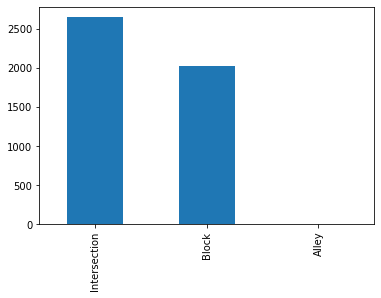

In [8]:
print(df["ADDRTYPE"].value_counts())
df["ADDRTYPE"].value_counts().plot(kind='bar')

Intersection    2651
Block           2029
Name: ADDRTYPE, dtype: int64


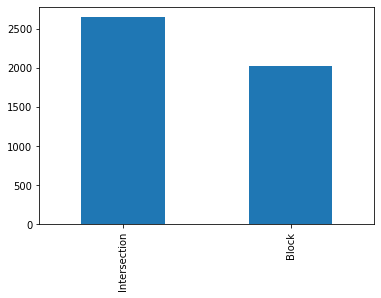

In [9]:
df.drop(df[(df["ADDRTYPE"]=='Alley')].index, inplace=True)
print(df["ADDRTYPE"].value_counts())
df["ADDRTYPE"].value_counts().plot(kind='bar')

Daylight                    3467
Dark - Street Lights On      794
Dusk                         188
Dawn                          93
Unknown                       87
Dark - No Street Lights       26
Dark - Street Lights Off      24
Other                          1
Name: LIGHTCOND, dtype: int64


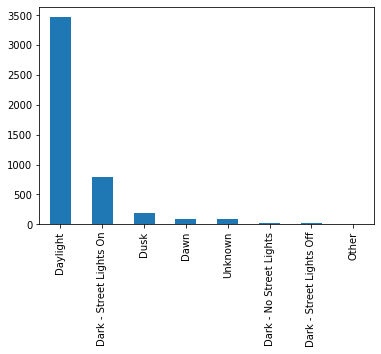

In [10]:
print(df["LIGHTCOND"].value_counts())
df["LIGHTCOND"].value_counts().plot(kind='bar')

Daylight                   3467
Dark - Street Lights On     794
Name: LIGHTCOND, dtype: int64


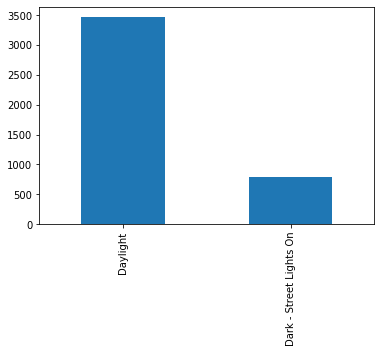

In [11]:
df.drop(df[(df["LIGHTCOND"]=='Dusk')].index, inplace=True)
df.drop(df[(df["LIGHTCOND"]=='Dawn')].index, inplace=True)
df.drop(df[(df["LIGHTCOND"]=='Unknown')].index, inplace=True)
df.drop(df[(df["LIGHTCOND"]=='Dark - No Street Lights')].index, inplace=True)
df.drop(df[(df["LIGHTCOND"]=='Dark - Street Lights Off')].index, inplace=True)
df.drop(df[(df["LIGHTCOND"]=='Other')].index, inplace=True)

print(df["LIGHTCOND"].value_counts())
df["LIGHTCOND"].value_counts().plot(kind='bar')

Clear                       3160
Overcast                     602
Raining                      453
Unknown                       38
Other                          2
Fog/Smog/Smoke                 2
Snowing                        2
Blowing Sand/Dirt              1
Sleet/Hail/Freezing Rain       1
Name: WEATHER, dtype: int64


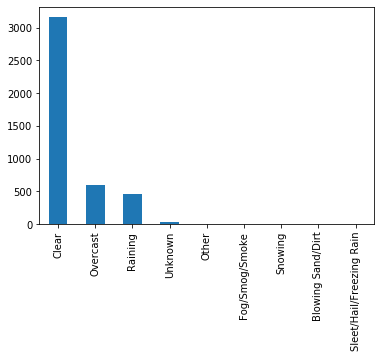

In [12]:
print(df["WEATHER"].value_counts())
df["WEATHER"].value_counts().plot(kind='bar')

Clear       3160
Overcast     602
Raining      453
Name: WEATHER, dtype: int64


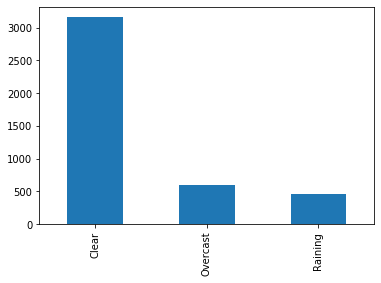

In [13]:
df.drop(df[(df["WEATHER"]=='Snowing')].index, inplace=True)
df.drop(df[(df["WEATHER"]=='Fog/Smog/Smoke')].index, inplace=True)
df.drop(df[(df["WEATHER"]=='Unknown')].index, inplace=True)
df.drop(df[(df["WEATHER"]=='Blowing Sand/Dirt')].index, inplace=True)
df.drop(df[(df["WEATHER"]=='Sleet/Hail/Freezing Rain')].index, inplace=True)
df.drop(df[(df["WEATHER"]=='Other')].index, inplace=True)

print(df["WEATHER"].value_counts())
df["WEATHER"].value_counts().plot(kind='bar')

Dry               3497
Wet                688
Unknown             15
Ice                  7
Standing Water       3
Snow/Slush           3
Other                1
Sand/Mud/Dirt        1
Name: ROADCOND, dtype: int64


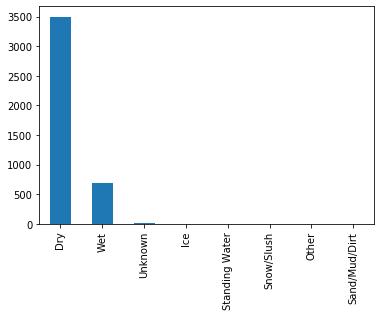

In [14]:
print(df["ROADCOND"].value_counts())
df["ROADCOND"].value_counts().plot(kind='bar')

Dry    3497
Wet     688
Name: ROADCOND, dtype: int64


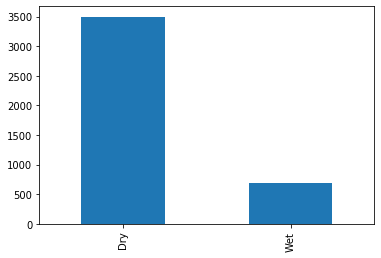

In [15]:
df.drop(df[(df["ROADCOND"]=='Ice')].index, inplace=True)
df.drop(df[(df["ROADCOND"]=='Snow/Slush')].index, inplace=True)
df.drop(df[(df["ROADCOND"]=='Standing Water')].index, inplace=True)
df.drop(df[(df["ROADCOND"]=='Sand/Mud/Dirt')].index, inplace=True)
df.drop(df[(df["ROADCOND"]=='Other')].index, inplace=True)
df.drop(df[(df["ROADCOND"]=='Unknown')].index, inplace=True)

print(df["ROADCOND"].value_counts())
df["ROADCOND"].value_counts().plot(kind='bar')

In [16]:
df = df.applymap(str)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4185 entries, 79 to 191524
Data columns (total 5 columns):
SEVERITYCODE    4185 non-null object
ADDRTYPE        4185 non-null object
WEATHER         4185 non-null object
ROADCOND        4185 non-null object
LIGHTCOND       4185 non-null object
dtypes: object(5)
memory usage: 196.2+ KB


In [18]:
df.head()

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND
79,1,Intersection,Clear,Dry,Daylight
117,2,Block,Clear,Dry,Daylight
131,2,Block,Clear,Dry,Daylight
149,2,Block,Clear,Dry,Daylight
245,2,Block,Clear,Dry,Daylight


In [19]:
df["WEATHER"]=df["WEATHER"].replace({'Clear': '1', 'Overcast': '2', 'Raining': '3'})

In [20]:
df['ROADCOND'] = df['ROADCOND'].replace({'Dry': '1', 'Wet': '2'})

In [21]:
df['LIGHTCOND']= df['LIGHTCOND'].replace({'Daylight': '1', 'Dark - Street Lights On': '2'})

In [22]:
df['ADDRTYPE']= df['ADDRTYPE'].replace({'Intersection': '1', 'Block': '2'})

In [23]:
df.SEVERITYCODE.value_counts()

2    3702
1     483
Name: SEVERITYCODE, dtype: int64

In [24]:
#balance dataset

#split dataset by SEVERITYCODE values
df_majority = df[df.SEVERITYCODE=='2']
df_minority = df[df.SEVERITYCODE=='1']

#creeate upsampled minority dataset
df_minority_upsampled = resample(df_minority, replace=True, n_samples=3702, random_state=0)

#merge majority & minority sample
balanced = pd.concat([df_majority, df_minority_upsampled])

# change all values to string
balanced = balanced.astype(str)

balanced.SEVERITYCODE.value_counts()

2    3702
1    3702
Name: SEVERITYCODE, dtype: int64

In [25]:
# reset indices
balanced.reset_index(drop=True)

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,2,1,1,1
1,2,2,1,1,1
2,2,2,1,1,1
3,2,2,1,1,1
4,2,1,1,1,1
...,...,...,...,...,...
7399,1,1,1,1,1
7400,1,2,1,1,1
7401,1,2,1,1,1
7402,1,2,1,1,1


In [26]:
# Separate input features (X) and target variable (y)
y = np.asarray(balanced['SEVERITYCODE'])
X = np.asarray(balanced[['ADDRTYPE','WEATHER', 'LIGHTCOND', 'ROADCOND']])

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [28]:
#Decision Tree

#import model
from sklearn.tree import DecisionTreeClassifier

#Create instance of the model
clf = DecisionTreeClassifier(criterion="entropy", random_state = 0)

#Train the model on the data
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [29]:
#Train Model & Predict
DT_pred = clf.predict(x_test)
print(y_test[0:5])
print(DT_pred[0:5])

['1' '2' '1' '1' '2']
['1' '1' '1' '1' '1']


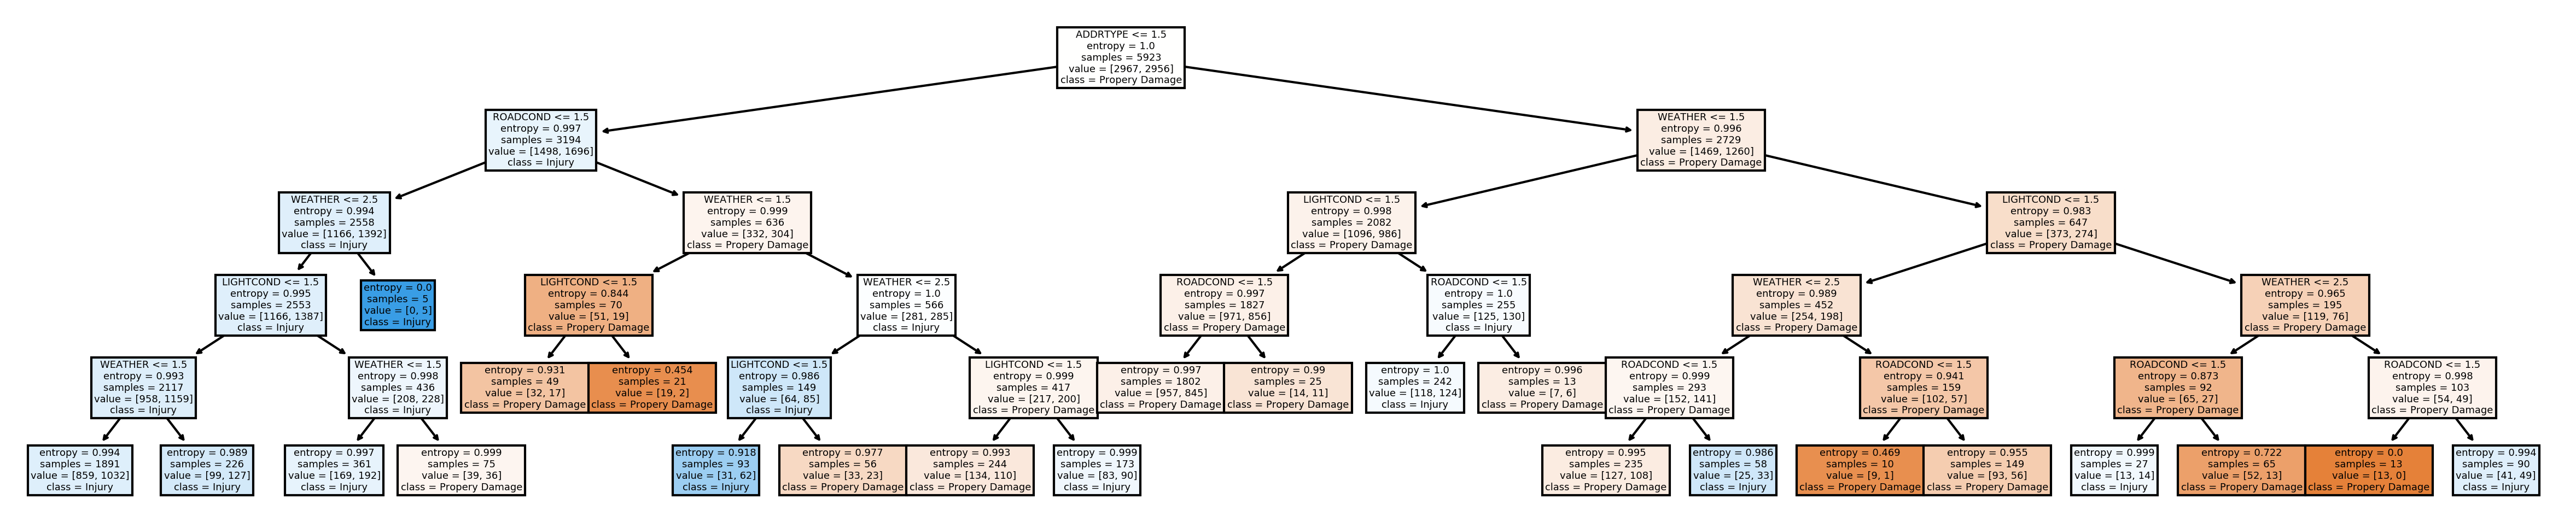

In [45]:
fn = ['ADDRTYPE','WEATHER', 'LIGHTCOND', 'ROADCOND']
cn = ['Propery Damage', 'Injury']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20,4),dpi=300)

tree.plot_tree(clf, feature_names = fn, class_names = cn, filled = True);

In [65]:
# Logistic Regression

#Building the LR Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=1, solver='liblinear', random_state=0).fit(x_train, y_train)
LR

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
# Train model & predict

LR_pred = LR.predict(x_test)
print(y_test[0:5])
print(LR_pred[0:5])

['1' '2' '1' '1' '2']
['2' '1' '1' '1' '1']


In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, DT_pred))

              precision    recall  f1-score   support

           1       0.55      0.51      0.53       735
           2       0.55      0.59      0.57       746

    accuracy                           0.55      1481
   macro avg       0.55      0.55      0.55      1481
weighted avg       0.55      0.55      0.55      1481



In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

           1       0.54      0.61      0.57       735
           2       0.56      0.48      0.52       746

    accuracy                           0.55      1481
   macro avg       0.55      0.55      0.55      1481
weighted avg       0.55      0.55      0.55      1481



In [74]:
from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y_test, DT_pred))

0.550303848750844


In [75]:
from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y_test, LR_pred))

0.5482781904118839
